# Task 1 - Importing the dataset using tensorflow  image dataset directory

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [54]:
IMAGE_SIZE=256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10  #(Trial and error, maybe i will change it furthur to see the performance increases, as of now my dataset is small so too 20)

In [27]:
train_dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "trainingData",
    
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

Found 613 files belonging to 4 classes.


In [29]:
class_names = train_dataset.class_names

In [30]:
class_names

['Type 1', 'Type 2', 'Type 3', 'normal']

In [31]:
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 2 3 1 2 0 3 3 0 3 3 0 0 2 1 1 1 2 1 0 3 0 2 2 0 2 0 0 3 0 2 0]


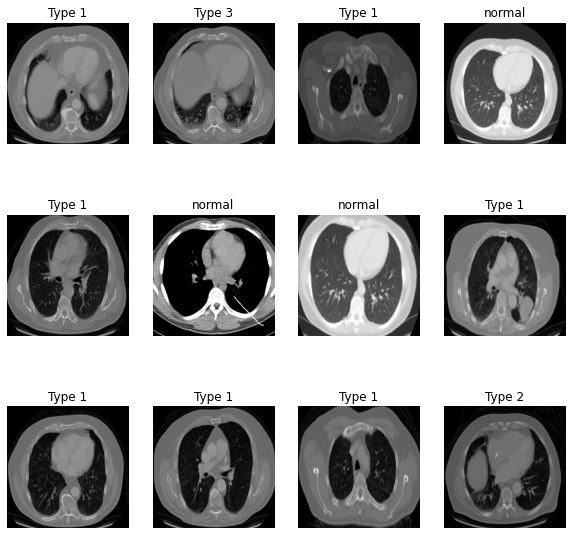

In [32]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [33]:
len(train_dataset)

20

In [34]:
32*20


640

In [35]:
#80% ==> Train
#10% ==> Validation
#10% ==> test

In [15]:
# in each eopch i run validation on the validation set

In [38]:
train_dataset.take(10) #This takes the first 10 samples 

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [37]:
len(train_dataset)

20

In [36]:
0.8*len(train_dataset)

16.0

In [20]:
# IF we are mixing the dataset in to a single file then use this code to split it in to train test and validation

In [ ]:
# train_ds = dataset.take(54)
# len(train_ds)
# val_size=0.1
# len(dataset)*val_size
# val_ds = test_ds.take(6)
# len(val_ds)
# test_ds = test_ds.skip(6)
# len(test_ds)
# def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
#     assert (train_split + test_split + val_split) == 1
    
#     ds_size = len(ds)
    
#     if shuffle:
#         ds = ds.shuffle(shuffle_size, seed=12)
    
#     train_size = int(train_split * ds_size)
#     val_size = int(val_split * ds_size)
    
#     train_ds = ds.take(train_size)    
#     val_ds = ds.skip(train_size).take(val_size) #skips entries till that point
#     test_ds = ds.skip(train_size).skip(val_size)
    
#     return train_ds, val_ds, test_ds

# train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
# len(train_ds)
# len(val_ds)
# len(test_ds)
# # Cache, Shuffle, and Prefetch the Dataset
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# # Cache, Shuffle, and Prefetch the Dataset
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  #improves performance of the pipeline
# val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#prefetch(value) : How many batches do i want to prefetch (Autotune lets tensorflow decide how much is optimum to prefettch)

In [25]:
# #TensorFlow input pipeline reference
# https://www.youtube.com/watch?v=VFEOskzhhbc&t=35s
# #Optimising Tensorflow input pipeline preformance reference where you can learn about prefetch, cashing etc in detail
# https://www.youtube.com/watch?v=MLEKEplgCas&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=45

In [26]:
# For multiple epochs we are doing the same process, like loading, transforming, filtering , scaling, prefetch etc
# a lot , Caching does help in this case to DO all the other works in 1st epoch and then from the second epoch it just trains my model


# Since we are using seperate input files as train test and validation we have to import it seperately

In [40]:
test_dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "testingData",
    
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

Found 315 files belonging to 4 classes.


In [41]:
validation_dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "validationData",
    
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

Found 72 files belonging to 4 classes.


In [42]:
# Cache, Shuffle, and Prefetch the Dataset
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  #improves performance of the pipeline
val_ds = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Task 2 - Preprocessing pipeline

In [ ]:
# Our scale is rgb so each image is a n array represented by numbers between 0 to 255, so we have to scale the
# image to a value between 0 to 1 for the we normalise it, or divide each and every value with 255

## Creating a Layer for Resizing and Normalization

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it




In [44]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])



In [47]:
# Tensorflow Data sugmentation
#Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.
# From existing samples we try to generate new samples we rotate some images, cnn is not that good at 
#identifying images when we use for testing is a rotated sameple

#An image --> Horizontal flip, change contrast, rotate , zoom etc so from a single image 4 new images. are generated

In [46]:
#Watch this video to understand how we use The following lines of codes to learn data sugmentation
#https://www.youtube.com/watch?v=mTVf7BN7S8w&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=26

In [49]:
# Creating a data augmentation layer
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [50]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Task 3 - Model Building and Model training

In [51]:
# Convolutional neural network
# https://www.youtube.com/watch?v=zfiSAzpy9NM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=23

In [ ]:
# search for tensorflow conv 2d layer

In [59]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define the model
with tf.device('/cpu:0'):  # Use CPU for preprocessing steps
    preprocess = models.Sequential([resize_and_rescale])

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape), #32 layers trial and error can experiment on that
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),  #For hiddel layers popular activation funtion is relu
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),  #pooling, reducing size, but preserving data
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  #We can play around with number of layers to optimise performance
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  #softmax normalises the probability of our classes
])

model.build(input_shape=input_shape)

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (32, 60, 60, 64)         

## Training the model

In [ ]:
# We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [62]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [63]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

InvalidArgumentError: Cannot assign a device for operation sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip: Could not satisfy explicit device specification '' because the node {{colocation_node sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
RngReadAndSkip: CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  sequential_2_random_flip_stateful_uniform_full_int_rngreadandskip_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip (RngReadAndSkip) 
  sequential_2/random_flip/stateful_uniform_full_int_1/RngReadAndSkip (RngReadAndSkip) 

	 [[{{node sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip}}]] [Op:MakeIterator]

In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Example resize and rescale layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define the model
with tf.device('/cpu:0'):  # Use CPU for preprocessing steps
    preprocess = models.Sequential([resize_and_rescale])

model = models.Sequential([
    preprocess,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

test_loss, test_acc = model.evaluate(val_ds)
print(f'Test accuracy: {test_acc}')


InvalidArgumentError: Cannot assign a device for operation sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip: Could not satisfy explicit device specification '' because the node {{colocation_node sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
RngReadAndSkip: CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  sequential_2_random_flip_stateful_uniform_full_int_rngreadandskip_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip (RngReadAndSkip) 
  sequential_2/random_flip/stateful_uniform_full_int_1/RngReadAndSkip (RngReadAndSkip) 

	 [[{{node sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip}}]] [Op:MakeIterator]

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example data augmentation layer
def resize_and_rescale(image, label):
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

@tf.function
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

# Assuming you have tf.data.Dataset objects `train_ds` and `val_ds`
train_ds = train_ds.map(resize_and_rescale).map(augment).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(resize_and_rescale).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define the model
with tf.device('/cpu:0'):  # Use CPU for preprocessing steps
    preprocess = tf.keras.Sequential([
        layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
        layers.Rescaling(1./255),
    ])

with tf.device('/gpu:0'):  # Use GPU for training steps
    model = models.Sequential([
        preprocess,
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
    ])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

test_loss, test_acc = model.evaluate(val_ds)
print(f'Test accuracy: {test_acc}')


InvalidArgumentError: Cannot assign a device for operation sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip: Could not satisfy explicit device specification '' because the node {{colocation_node sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
RngReadAndSkip: CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  sequential_2_random_flip_stateful_uniform_full_int_rngreadandskip_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip (RngReadAndSkip) 
  sequential_2/random_flip/stateful_uniform_full_int_1/RngReadAndSkip (RngReadAndSkip) 

	 [[{{node sequential_2/random_flip/stateful_uniform_full_int/RngReadAndSkip}}]] [Op:MakeIterator]